In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/AA_PROJ_2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive/AA_PROJ_2'
/content/drive/My Drive/AA_PROJ_2


In [ ]:
import pandas as pd
import os
import re
from tqdm import tqdm
import pickle
import numpy as np
import librosa
from sklearn.model_selection import train_test_split 

pickle_path = "Pickled_Data/simple_pickle"
file_location = "data/FMA/FMA/fma_small"

train_location ="Pickled_Data/simple_pickle/npData_10sec/train"
test_location ="Pickled_Data/simple_pickle/npData_10sec/test"
valid_location ="Pickled_Data/simple_pickle/npData_10sec/valid"

In [ ]:
tracks = pd.read_csv("data/FMA/FMA/fma_metadata/tracks.csv", index_col=0, header=[0, 1])


In [ ]:
tracksFiltered = tracks[[('set', 'split'),('set', 'subset'),('track', 'genre_top'), ('track', 'genres')]]
isSmallData = tracksFiltered[('set', 'subset')] == 'small' 

In [ ]:
genreNamesDF = pd.read_csv("data/FMA/FMA/fma_metadata/genres.csv", index_col=0, header=0)
genreDict = genreNamesDF["title"].squeeze().to_dict()

In [ ]:
filelist =[]
y=[]
smallDataset = tracksFiltered[isSmallData][[('set', 'split'),('set', 'subset'),('track', 'genre_top')]]
isMp3 = re.compile(r'\d+.mp3')

id = re.compile(r'\d+(?=.mp3)')

for root, dirs, files in os.walk("data/FMA/FMA/fma_small"):
	for file in files:
		if isMp3.search(file):
			filelist.append(os.path.join(root,file))
			num = int(id.search(file).group())
			y.append(smallDataset.loc[num][('track', 'genre_top')])
	


In [ ]:
file_list_out = open("Pickled_Data/simple_pickle/file_list.pickle","wb") 
pickle.dump(filelist,file_list_out)
file_list_out.close()
y_out = open("Pickled_Data/simple_pickle/labels.pickle","wb") 
pickle.dump(y,y_out)
y_out.close()

In [ ]:
fileList = pickle.load(open(os.path.join(pickle_path,"file_list.pickle"),"rb"))
labels = pickle.load(open(os.path.join(pickle_path,"labels.pickle"),"rb"))

In [ ]:

X_train, X_test, y_train, y_test  = train_test_split(fileList, labels, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [ ]:
print(len(X_train),len(y_train))
print(len(X_val),len(y_val))
print(len(X_test),len(y_test))
print(X_train)
filename_regex=re.compile(r'\d+.mp3')
print(filename_regex.search(X_train[0]).group())

4796 4796
1599 1599
1599 1599
['data/FMA/FMA/fma_small/147/147780.mp3', 'data/FMA/FMA/fma_small/153/153383.mp3', 'data/FMA/FMA/fma_small/042/042245.mp3', 'data/FMA/FMA/fma_small/120/120305.mp3', 'data/FMA/FMA/fma_small/130/130988.mp3', 'data/FMA/FMA/fma_small/133/133434.mp3', 'data/FMA/FMA/fma_small/095/095725.mp3', 'data/FMA/FMA/fma_small/120/120778.mp3', 'data/FMA/FMA/fma_small/007/007872.mp3', 'data/FMA/FMA/fma_small/127/127866.mp3', 'data/FMA/FMA/fma_small/111/111401.mp3', 'data/FMA/FMA/fma_small/116/116119.mp3', 'data/FMA/FMA/fma_small/044/044849.mp3', 'data/FMA/FMA/fma_small/078/078848.mp3', 'data/FMA/FMA/fma_small/058/058341.mp3', 'data/FMA/FMA/fma_small/064/064248.mp3', 'data/FMA/FMA/fma_small/120/120331.mp3', 'data/FMA/FMA/fma_small/024/024720.mp3', 'data/FMA/FMA/fma_small/055/055288.mp3', 'data/FMA/FMA/fma_small/080/080776.mp3', 'data/FMA/FMA/fma_small/056/056034.mp3', 'data/FMA/FMA/fma_small/100/100976.mp3', 'data/FMA/FMA/fma_small/118/118921.mp3', 'data/FMA/FMA/fma_small/01

In [ ]:
X_train_pickle = open("Pickled_Data/simple_pickle/X_train.pickle","wb") 
pickle.dump(X_train,X_train_pickle)
X_train_pickle.close()

X_val_pickle = open("Pickled_Data/simple_pickle/X_val.pickle","wb") 
pickle.dump(X_val,X_val_pickle)
X_val_pickle.close()

X_test_pickle = open("Pickled_Data/simple_pickle/X_test.pickle","wb") 
pickle.dump(X_test,X_test_pickle)
X_test_pickle.close()



y_train_pickle = open("Pickled_Data/simple_pickle/y_train.pickle","wb") 
pickle.dump(y_train,y_train_pickle)
y_train_pickle.close()

y_valid_pickle = open("Pickled_Data/simple_pickle/y_valid.pickle","wb") 
pickle.dump(y_val,y_valid_pickle)
y_valid_pickle.close()

y_test_pickle = open("Pickled_Data/simple_pickle/y_test.pickle","wb") 
pickle.dump(y_test,y_test_pickle)
y_test_pickle.close()

In [ ]:
y_train_loaded = pickle.load(open("Pickled_Data/simple_pickle/y_train.pickle","rb"))
print(len(y_train_loaded))

4796


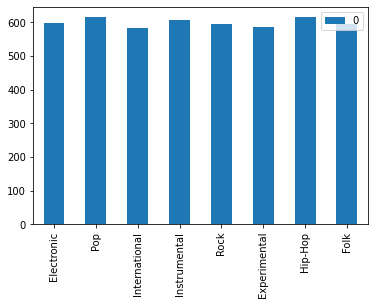

In [ ]:
import pandas
from collections import Counter
counts = Counter(y_train_loaded)
df = pandas.DataFrame.from_dict(counts, orient='index')
df.plot(kind='bar')

In [ ]:
print(len(X_train_loaded))

4797


In [ ]:
X_train_loaded = pickle.load(open("Pickled_Data/simple_pickle/X_train.pickle","rb"))

filename_regex=re.compile(r'\d+.mp3')
for fileName in X_train_loaded:
  
  wf, sr = librosa.load(fileName, offset=0, duration=10)
  wf = wf.astype(np.float32)
  isWaveformValid = wf.shape[0] == 220500
  if(isWaveformValid): 
    to_save_file_name = os.path.join(train_location,filename_regex.search(fileName).group()).replace('.mp3','.npy')
    np.save(to_save_file_name,wf)
  else:
    print(wf.shape[0])
    print(fileName)
 
  
  
		


In [ ]:
'''
for root, dirs, files in os.walk("Pickled_Data/simple_pickle/npData_10sec/train"):
  for file in tqdm(files):
    value = np.load(os.path.join(root,file))
 '''   

'\nfor root, dirs, files in os.walk("Pickled_Data/simple_pickle/npData_10sec/train"):\n  for file in tqdm(files):\n    value = np.load(os.path.join(root,file))\n '

In [ ]:
X_test_loaded = pickle.load(open("Pickled_Data/simple_pickle/X_test.pickle","rb"))

filename_regex=re.compile(r'\d+.mp3')
for fileName in X_test_loaded:
  
  wf, sr = librosa.load(fileName, offset=0, duration=10)
  wf = wf.astype(np.float32)
  isWaveformValid = wf.shape[0] == 220500
  if(isWaveformValid): 
    to_save_file_name = os.path.join(test_location,filename_regex.search(fileName).group()).replace('.mp3','.npy')
    np.save(to_save_file_name,wf)
  else:
    print(wf.shape[0])
    print(fileName)
 
  
  
		


In [ ]:
X_valid_loaded = pickle.load(open("Pickled_Data/simple_pickle/X_val.pickle","rb"))

filename_regex=re.compile(r'\d+.mp3')
for fileName in X_valid_loaded:
  
  wf, sr = librosa.load(fileName, offset=0, duration=10)
  wf = wf.astype(np.float32)
  isWaveformValid = wf.shape[0] == 220500
  if(isWaveformValid): 
    to_save_file_name = os.path.join(valid_location,filename_regex.search(fileName).group()).replace('.mp3','.npy')
    np.save(to_save_file_name,wf)
  else:
    print(wf.shape[0])
    print(fileName)
 
  
  
		
